# Predicting Newsletter Subscription in Minecraft Players

## Introduction:

### Background
The studying of player engagement and behavior in games such as Minecraft is a growing in the field of data science. In this project, I will be wokring with a research group at the University of British Columbia led by Dr. Frank Wood, which is investigating the behaviours and activities of players in a custom Minecraft game server. They collected each player’s activity over time, which allowed them to study their behavior, preferences, and play patterns.

### Question
The aim of this project is to answer the following question:
"Can characteristics of a player (e.g., behavior, play frequency, time-of-day usage) predict whether they will subscribe to the game-related newsletter?"
This question is quite intersting as it can help identify the types of players who most likley to show more engaggemnet and interests in the projects. This will also help with gettings player who have more long-term interest, which will help prioritize players for future studies.

### Data Description
To answer this question, this project will use two datasets:

* `players.csv`: Contains demographic and behavioral features of individual players, such as age, device, and whether they are subscribed to a newsletter.
* `sessions.csv`: Contains a record of each game session for each player, whcih includes timestamps, session length, and actions taken.
In this project, these datasets will be wrangled and used to construct meaningful visuals and relationships related to player behavior and characteristics to identify which features are most predictive of newsletter subscription.



## Methods and Results:

### Reading and Loading the Data
First let's load the libary `tidyverse` to get a package of functions. Then, lets read both of the datasets using the function `read_csv` and assign them to an object. Since the datastes are quite big, we can use the function `head` to get the first few rows to see what we are working with.

In [1]:
library(tidyverse)
library(ggplot2)
library(cowplot)
library(repr)
library(rsample)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymo

In [2]:
players_data <- read_csv("data/players.csv")
head(players_data)
sessions_data <- read_csv("data/sessions.csv")
head(sessions_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


### Wrangling and Cleaning

Now that we have read our data, it is now time to clean and wrangle it to make it easier to analyze. First, I joined both of the datasets so i can work with just one combined one. Then, I grouped the data by player characteristics like gender, age, experience level, subscription status, and played hours. Lastly, I used the count function in summarize to see how many times each player joined the game and created a summary table with one row for each group of players. This made the data much simpler.

In [3]:
combined_data <- inner_join(players_data, sessions_data, by = "hashedEmail")

combined_summary <- combined_data |>
  group_by(name, gender, Age, hashedEmail, experience, subscribe, played_hours) |>
  summarise(session_count = n(), .groups = "drop")

final_data <- combined_summary |>
    select(!hashedEmail & !name)

head(final_data)

gender,Age,experience,subscribe,played_hours,session_count
<chr>,<dbl>,<chr>,<lgl>,<dbl>,<int>
Prefer not to say,17,Beginner,TRUE,0.2,1
Non-binary,17,Amateur,TRUE,1.2,2
Other,NA,Pro,TRUE,0.2,1
Prefer not to say,25,Veteran,FALSE,1.4,6
Non-binary,20,Regular,TRUE,218.1,95
Male,17,Amateur,TRUE,53.9,130


### Visualization

This data is now mcuh more clean to work with, making it ready for further analysis. With this cleaned dataset, I can now create visualizations using the library `ggplot2` and the fucntion `ggplot` to explore relationships between variables, allowing me to see which variables would make good predictors for classifying newsletter subscription status. Here are the plots I will be making:
* Gender VS Played Hours (With Subscription Status)
* Gender VS Session Count (With Subscription Status)
* Age VS Played Hours (With Subscription Status)
* Age VS Session Count (With Subscription Status)
* Experience VS Played Hours (With Subscription Status)
* Experience VS Session Count (With Subscription Status)

In [4]:
GenderVPlayedhours <- final_data |>
    ggplot(aes(x = gender, y = played_hours, color = subscribe)) +
        geom_point() +
        labs(x = "Gender", y = "Hours Played", color = "Newsletter Subscription Status")

GenderVSessionCount <- final_data |>
    ggplot(aes(x = gender, y = session_count, color = subscribe)) +
        geom_point() +
        labs(x = "Gender", y = "Session Count", color = "Newsletter Subscription Status")

AgeVPlayedhours <- final_data |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
        geom_point() +
        labs(x = "Age", y = "Hours Played", color = "Newsletter Subscription Status")

AgeVSessionCount <- final_data |>
    ggplot(aes(x = Age, y = session_count, color = subscribe)) +
        geom_point() +
        labs(x = "Age", y = "Session Count", color = "Newsletter Subscription Status")

ExpVPlayedhours <- final_data |>
    ggplot(aes(x = experience, y = played_hours, color = subscribe)) +
        geom_point() +
        labs(x = "Experience", y = "Hours Played", color = "Newsletter Subscription Status")

ExpVSessionCount <- final_data |>
    ggplot(aes(x = experience, y = session_count, color = subscribe)) +
        geom_point() +
        labs(x = "Experience", y = "Session Count", color = "Newsletter Subscription Status")


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


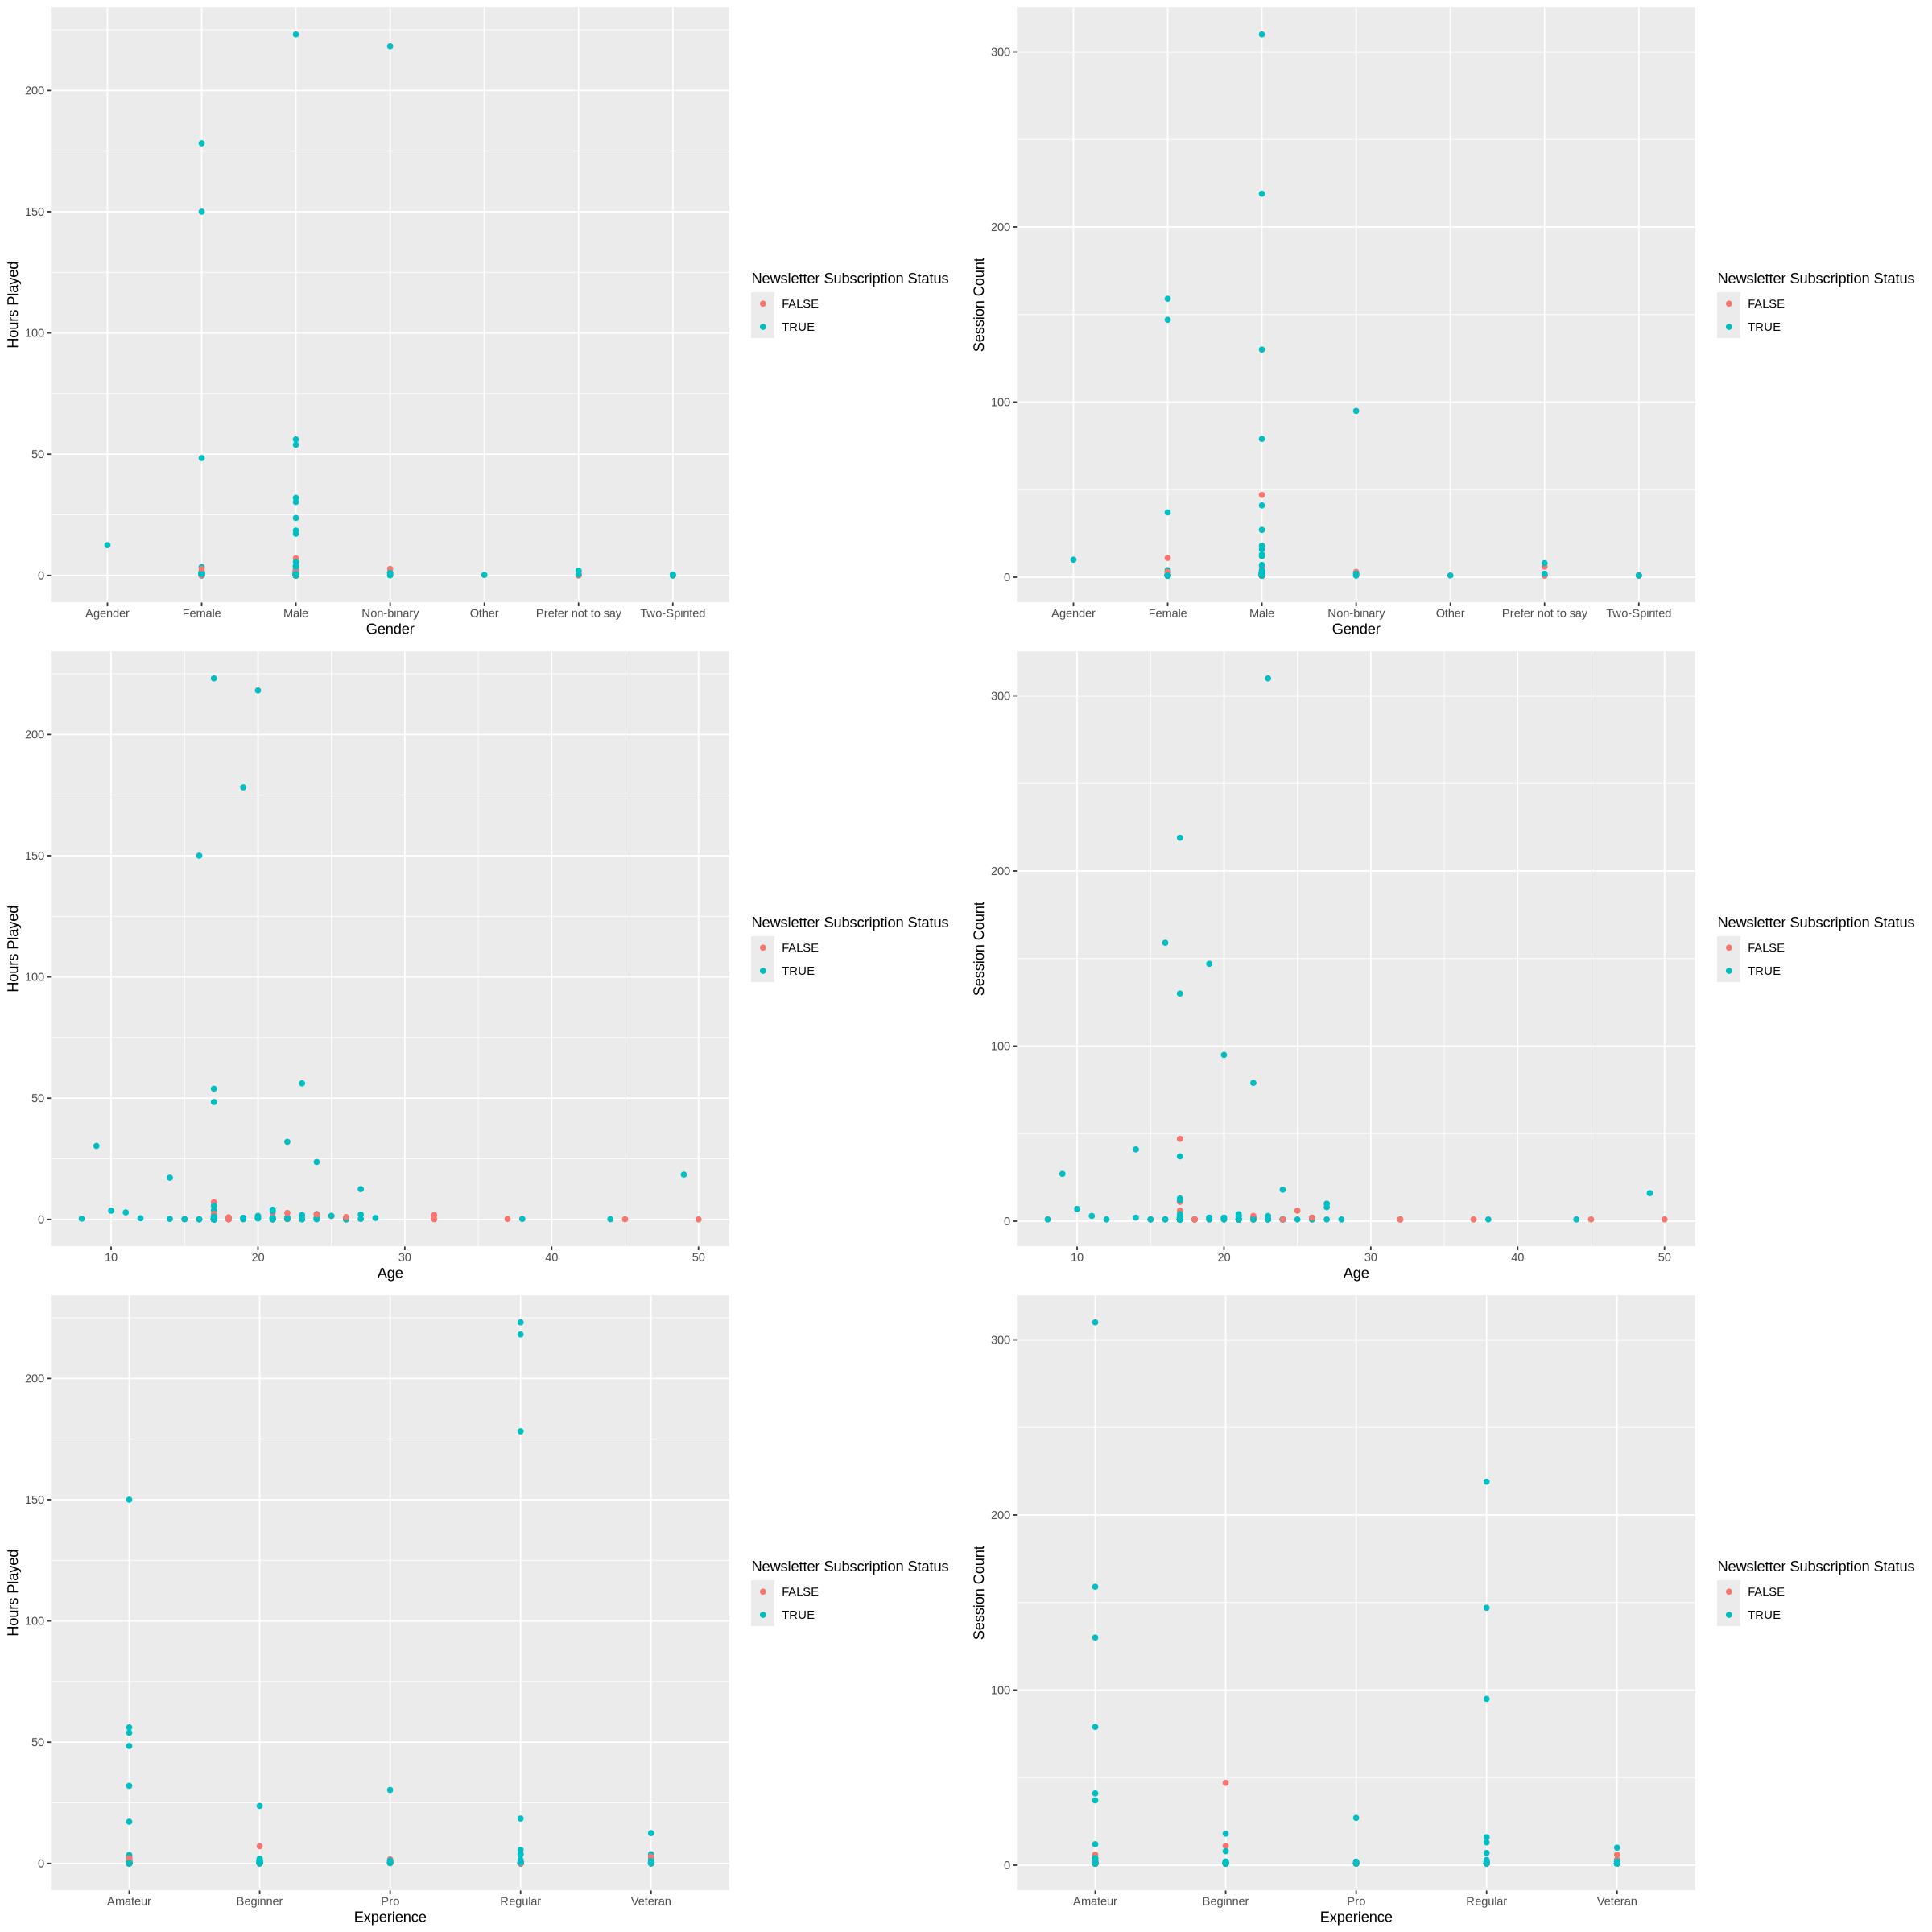

In [5]:
library(gridExtra)
options(repr.plot.width = 20, repr.plot.height = 20)
grid.arrange(GenderVPlayedhours, GenderVSessionCount, AgeVPlayedhours, AgeVSessionCount, ExpVPlayedhours, ExpVSessionCount, ncol = 2)

Great! Now we can see all of the variables. From the plots baove, every variable has some sort of relationship, which make them all good predictors for our model. 

In [9]:
set.seed(22)

final_data <- final_data |>
    mutate(subscribe = as.factor(subscribe))

data_split <- initial_split(final_data, prop = 0.75, strata = subscribe)
testing_data <- testing(data_split)
training_data <- training(data_split)

model <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

recipe <- recipe(subscribe ~ gender + Age + experience + played_hours + session_count, data = training_data)

data_fold <- vfold_cv(training_data, v = 5, strata = subscribe)

data_fit <- workflow() |>
    add_model(model) |>
    add_recipe(recipe)
    

data_results <- data_fit |>
    tune_grid(resamples = data_fold, grid = tibble(neighbors = seq(from = 1, to = 74, by = 1))) |>
    collect_metrics()

data_max <- data_results |>
    filter(.metric == "accuracy") |>
    slice_max(neighbors, n = 1)
data_max

    
    


→ A | warning: 74 samples were requested but there were 74 rows in the data. 69 will be used.

There were issues with some computations   A: x1

There were issues with some computations   A: x2

→ B | error:   ℹ In index: 73.
               Caused by error in `[.default`:
               ! only 0's may be mixed with negative subscripts

There were issues with some computations   A: x2
There were issues with some computations   A: x3   B: x2

→ C | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 18 rows.
               ✖ Assigned data has 19 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 19 to size 18.

There were issues with some computations   A: x3   B: x2
→ D | warning: 74 samples were requested but there were 76 rows in the data. 71 will be used.

There were issues with some computations   A: x3   B: x2


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
74,accuracy,binary,0.750774,2,0.01393189,Preprocessor1_Model74
